In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
            discriminant_analysis, random_projection)

              fid           mjd          ra       dec  magpsf_corr  \
oid                                                                  
ZTF18abefyya    2  58647.293681  274.347583 -7.689340    16.893037   
ZTF18abefyya    2  58575.459016  274.347481 -7.689254    17.355343   
ZTF18abefyya    2  58608.481921  274.347531 -7.689337    17.325110   
ZTF18abefyya    2  58607.356933  274.347498 -7.689360    17.328151   
ZTF18abefyya    2  58605.439329  274.347495 -7.689260    17.296300   

              sigmapsf_corr  
oid                          
ZTF18abefyya       0.024026  
ZTF18abefyya       0.034980  
ZTF18abefyya       0.038761  
ZTF18abefyya       0.039293  
ZTF18abefyya       0.036019  
             classALeRCE          ra        dec     period     source  \
oid                                                                     
ZTF18aakyuls         RRL  275.710304  36.051157   0.550747  CRTSnorth   
ZTF18abnznco         RRL  359.935451  17.656745  0.2710382     ASASSN   
ZTF18aa

Text(0.5,1,'ZTF18abefyya light curve')

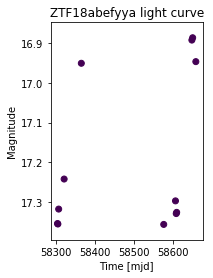

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


detections = pd.read_pickle('C:/Users/sebas/Desktop/Ingenieria/8 semestre/Inteligencia Computacional/proyecto/data_representativity/detections_664k.pkl')
features = pd.read_pickle('C:/Users/sebas/Desktop/Ingenieria/8 semestre/Inteligencia Computacional/proyecto/data_representativity/features_664k.pkl')
labels = pd.read_pickle('C:/Users/sebas/Desktop/Ingenieria/8 semestre/Inteligencia Computacional/proyecto/data_representativity/labels.pkl')

print(detections.head())
print(labels.head())

# How are the classes distributed?
print(labels[['classALeRCE', 'ra']].groupby('classALeRCE').count())

# Plot an object
first_object_oid = detections.index.values[0]#20760278
first_object_detections = detections.loc[first_object_oid]

print(f'Object {first_object_oid} has {len(first_object_detections)} detections')

plt.figure()
plt.subplot(1, 2, 1)
plt.scatter(
    first_object_detections.mjd,
    first_object_detections.magpsf_corr,
    c=first_object_detections.fid)

# In astronomy we plot the magnitude axis inverted (higher magnitude, dimmer objects)
plt.gca().invert_yaxis()
plt.xlabel('Time [mjd]')
plt.ylabel('Magnitude')
plt.title(f'{first_object_oid} light curve')

# Let's do a simple scatter of two features
#means = features[['Mean_1', 'Mean_2']].copy()
#means.dropna(inplace=True)

#plt.subplot(1, 2, 2)
#plt.scatter(
   # means.values[:, 0] - means.values[:, 1],
    #means.values[:, 0],
    #alpha=0.005
#)
#plt.ylabel('Mean_1')
#plt.xlabel('Mean_1 - Mean_2')
#plt.title('g mean magnitude vs "color" for ALeRCE - ZTF dataset')
#plt.show()

Text(0.5,1,'ZTF18abefyya light curve')

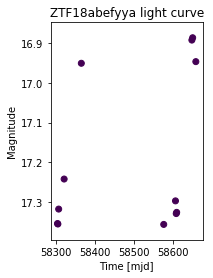

In [3]:
first_object_detections = detections.loc['ZTF18abefyya']

plt.figure()
plt.subplot(1, 2, 1)
plt.scatter(
    first_object_detections.mjd,
    first_object_detections.magpsf_corr,
    c=first_object_detections.fid)

plt.gca().invert_yaxis()
plt.xlabel('Time [mjd]')
plt.ylabel('Magnitude')
plt.title(f'{first_object_oid} light curve')

### Creación del nuevo dataframe

In [4]:
DFclas=features.loc[labels.index]
DFclas=DFclas.dropna()

#para visualizar las columnas y filas de los dataframes usar los siguientes:
#DFclas.head()
#labels.dropna()
#labels.head()

In [5]:
a=[]
for i in range(len(DFclas.index)):
    a.append(labels.loc[DFclas.index[i]][0])

#Se añade una nueva columna con la clase   
DFclas['clase']=a
#DFclas.head()

In [6]:
#Visualizacion de ejemplos por clase para el nuevo dataframe
DFclas.groupby('clase').count()

,n_samples_1,Amplitude_1,AndersonDarling_1,Autocor_length_1,Beyond1Std_1,Con_1,Eta_e_1,Gskew_1,MaxSlope_1,Mean_1,...,Pvar_2,ExcessVar_2,GP_DRW_sigma_2,GP_DRW_tau_2,SF_ML_amplitude_2,SF_ML_gamma_2,IAR_phi_2,LinearTrend_2,gal_b,gal_l
clase,,,,,,,,,,,,,,,,,,,,,
AGN-I,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409,...,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409
AGN-II,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
Blazar,546,546,546,546,546,546,546,546,546,546,...,546,546,546,546,546,546,546,546,546,546
CV/Nova,518,518,518,518,518,518,518,518,518,518,...,518,518,518,518,518,518,518,518,518,518
Ceph,360,360,360,360,360,360,360,360,360,360,...,360,360,360,360,360,360,360,360,360,360
DSCT,490,490,490,490,490,490,490,490,490,490,...,490,490,490,490,490,490,490,490,490,490
EBC,4377,4377,4377,4377,4377,4377,4377,4377,4377,4377,...,4377,4377,4377,4377,4377,4377,4377,4377,4377,4377
EBSD/D,16981,16981,16981,16981,16981,16981,16981,16981,16981,16981,...,16981,16981,16981,16981,16981,16981,16981,16981,16981,16981
LPV,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,...,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649


### Conjunto de supernovas

In [7]:
S1=DFclas['clase']=='SLSN'
S2=DFclas['clase']=='SNII'
S3=DFclas['clase']=='SNIIb'
S4=DFclas['clase']=='SNIIn'
S5=DFclas['clase']=='SNIa'
S6=DFclas['clase']=='SNIbc'

#Hay que añadir CV/nova??

dfS1=DFclas[S1]
dfS2=DFclas[S2]
dfS3=DFclas[S3]
dfS4=DFclas[S4]
dfS5=DFclas[S5]
dfS6=DFclas[S6]

SN=pd.concat([dfS1,dfS2,dfS3,dfS4,dfS5,dfS6])
SN['clase']='SN'
#SN

In [8]:
import random 
n=500
aleatorios = [random.randint(1,512) for _ in range(n)]

SN=SN.dropna()
dfSN=SN.iloc[aleatorios]
#dfSN

In [9]:
# Se creara el dataframe que contenga 100 ejemplos de cada clase y otro con 500 ejemplos
# Las clases con menos ejemplos que los indicados no se tomaran en cuenta.

AGNI=DFclas['clase']=='AGN-I'
dfAGNI=DFclas[AGNI]

Blazar=DFclas['clase']=='Blazar'
dfBlazar=DFclas[Blazar]

CVNova=DFclas['clase']=='CV/Nova'
dfCVNova=DFclas[CVNova]

Ceph=DFclas['clase']=='Ceph' #menos de 500
dfCeph=DFclas[Ceph]

DSCT=DFclas['clase']=='DSCT' #menos de 500
dfDSCT=DFclas[DSCT]

EBC=DFclas['clase']=='EBC'
dfEBC=DFclas[EBC]

EBSDD=DFclas['clase']=='EBSD/D'
dfEBSDD=DFclas[EBSDD]

LPV=DFclas['clase']=='LPV'
dfLPV=DFclas[LPV]

PeriodicOther=DFclas['clase']=='Periodic-Other'
dfPO=DFclas[PeriodicOther]

RRL1000=DFclas['clase']=='RRL'
dfRRL=DFclas[RRL1000] 

#SNIa=DFclas['clase']=='SNIa'  #menos de 500 
#dfSNIa=DFclas[SNIa]


# Estos son los dos conjuntos finales


DF5=pd.concat([dfRRL[0:500],dfAGNI[0:500],dfBlazar[0:500],dfCVNova[0:500],dfEBC[0:500],dfEBSDD[0:500],dfLPV[0:500],dfPO[0:500],dfSN[0:500]])

DF1=pd.concat([dfAGNI[0:100],dfBlazar[0:100],dfCVNova[0:100],dfEBC[0:100],dfEBSDD[0:100],dfLPV[0:100],dfPO[0:100],dfRRL[0:100],
               dfCeph[0:100],dfDSCT[0:100],dfSN[0:100]])

#Si es que se desea visualizar usar los siguientes:
#DF5.groupby('clase').count()
#DF1.groupby('clase').count()

## Comparación de caracteristicas

### Para 500 ejemplos

### Para 100 ejemplos

# Analisis t-SNE

### para 100 ejemplos

Text(0.5,1,'t-SNE')

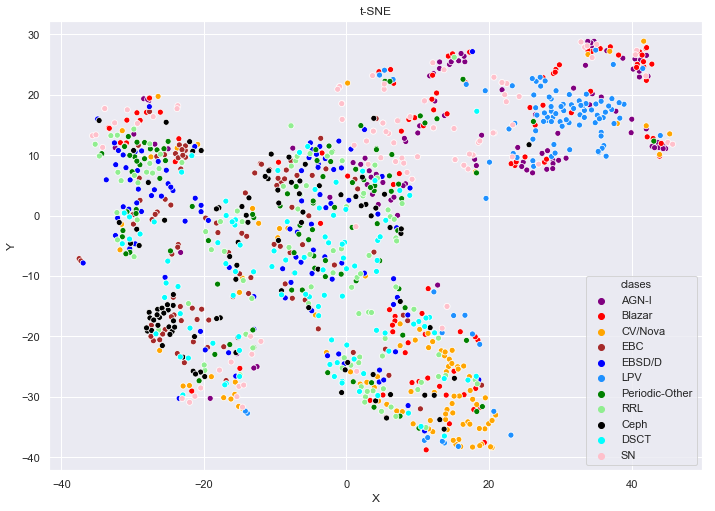

In [9]:
tsne = TSNE(n_components=2, random_state=0, perplexity=40)
y=DF1.iloc[:,96]
#data_X = digits.data[:600]
tsne_obj= tsne.fit_transform(DF1.iloc[:,0:95])
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'clases':y})

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x="X", y="Y",
              hue="clases",
              palette=['purple','red','orange','brown','blue',
                       'dodgerblue','green','lightgreen','black','aqua','pink',],
              legend='full',
              data=tsne_df);
plt.title('t-SNE')

## Elementos no etiquetados

In [10]:
import random 
n=1199
aleatorios = [random.randint(0,256983) for _ in range(n)]

dfsinetiq = features.drop(labels.index)
dfsinetiq=dfsinetiq.dropna()
df=dfsinetiq.iloc[aleatorios]
df['clase']='sin-clase'
DFalldata=pd.concat([DF1,df])  # Toda la data

dff=DFalldata.iloc[:,0:96]
data_norm=(dff-dff.min())/(dff.max()-dff.min())
data_norm2=data_norm
data_norm2['clase']=DFalldata['clase']


C:\Users\sebas\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Encontrar vecindades de elementos sin clase


* Dado el resultado del t-SNE, construya conjuntos de objetos no etiquetados que parezcan clusters y que no tengan mucho ejemplos etiquetados en sus cercanías. Entregue la lista de dichos object_id (oid) y grafique dichas curvas. Describa cualitativamente los objetos encontrados.


* Aplique un algoritmo de clustering en el espacio de features (antes del t-SNE) y detecte clusters dominados por ejemplos no etiquetados. Repita el análisis del punto anterior.

* Utilice la variante paramétrica de t-SNE para poder proyectar el dataset completo. Entrene sobre un conjunto balanceado tal como se pidió para el caso no paramétrico.


## Encontrar las caracteristicas mas representativas

Se usara random forest para eliminar las caracteristicas que tengan poca relevancia, para esto se espera tener una importancia de las caracteristicas del 80% y 90%.

In [19]:
#muestra el conjunto de datos sin los target
#X = DF5.drop(['clase'],axis='columns')
X = DFalldata.drop(['clase'],axis='columns')
#muestra el vector de los target de DFclas
#Y=DF5.iloc[:,-1]
Y=DFalldata.iloc[:,-1]

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, stratify=Y)

classifier = RandomForestClassifier(n_estimators=40,max_depth=30)
classifier.fit(X_train, Y_train)

feature_importances = classifier.feature_importances_
importance_order = np.argsort(-feature_importances)
feature_names = DFalldata.columns.values



C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [20]:
#Numero de caracteristicas para llegar al 90%

suma=0
indice=0
algo=np.sort(feature_importances)[::-1]
for i in range(len(algo)):
    if suma<=0.8:
        suma = suma+algo[i]
        indice=i
print(indice)
print(suma)

59
0.8032589627658889


In [21]:

print('\nCaracteristicas ordenadas por importancia (RF)')
for index in importance_order:
    print('\t%.3f %s' % (feature_importances[index], feature_names[index]))


Caracteristicas ordenadas por importancia (RF)
	0.070 gal_b
	0.042 Mean_2
	0.029 Mean_1
	0.027 PeriodLS_v2_1
	0.022 ExcessVar_1
	0.022 GP_DRW_tau_2
	0.021 GP_DRW_tau_1
	0.021 Meanvariance_1
	0.020 PeriodLS_v2_2
	0.017 GP_DRW_sigma_1
	0.016 Harmonics_mag_1_1
	0.016 PercentAmplitude_1
	0.015 Amplitude_1
	0.014 LinearTrend_2
	0.014 Std_1
	0.014 LinearTrend_1
	0.014 GP_DRW_sigma_2
	0.013 Meanvariance_2
	0.012 Harmonics_mse_1
	0.011 Skew_1
	0.011 MedianAbsDev_1
	0.011 Gskew_1
	0.011 Harmonics_mag_3_2
	0.011 Gskew_2
	0.011 Harmonics_mag_2_1
	0.011 Psi_eta_v2_1
	0.011 Std_2
	0.010 Rcs_1
	0.010 SF_ML_amplitude_2
	0.010 SF_ML_amplitude_1
	0.010 Skew_2
	0.010 PercentAmplitude_2
	0.010 SF_ML_gamma_2
	0.010 ExcessVar_2
	0.010 IAR_phi_1
	0.010 Harmonics_mag_1_2
	0.010 Q31_1
	0.010 gal_l
	0.009 Harmonics_mag_2_2
	0.009 Amplitude_2
	0.009 MedianAbsDev_2
	0.009 Harmonics_mag_6_2
	0.009 Harmonics_mag_3_1
	0.009 Q31_2
	0.009 Harmonics_mag_6_1
	0.009 Harmonics_mag_4_2
	0.009 Eta_e_2
	0.008 MedianBRP_2
	

Text(0.5,1,'t-SNE')

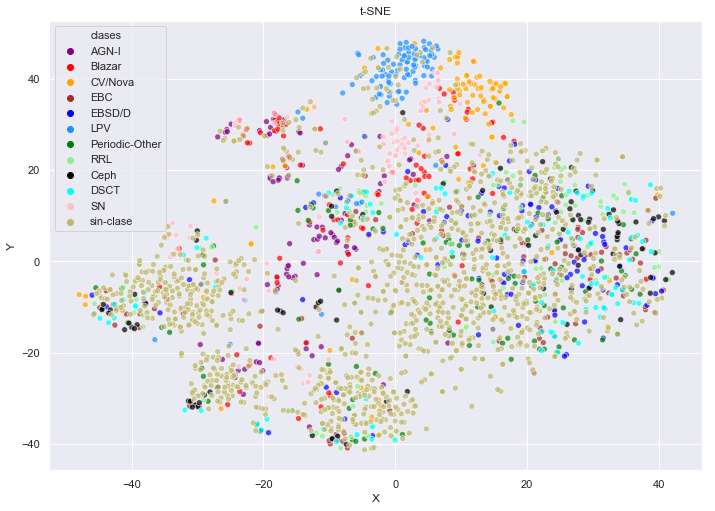

In [22]:
#NuevaData = DFalldata[DFalldata.columns.values[importance_order[0:53]]]
NuevaData1 = DFalldata[DFalldata.columns.values[importance_order[0:59]]]
dff=NuevaData1
tsne = TSNE(n_components=2, random_state=0, perplexity=40)
y=DFalldata.iloc[:,96]
#data_X = digits.data[:600]
data_norm=(dff-dff.min())/(dff.max()-dff.min())
tsne_obj= tsne.fit_transform(data_norm)
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'clases':y})

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x="X", y="Y",
              hue="clases",
              palette=['purple','red','orange','brown','blue',
                       'dodgerblue','green','lightgreen','black','aqua','pink','darkkhaki',],
              legend='full',
              data=tsne_df,alpha=0.7);
plt.title('t-SNE')

### Reconocer cluster de elementos sin clase

In [23]:
#Para el cluster de la izq
#Las ubicaciones dependen de como resulto el t-SNE y cuales elementos sin clase salieron del random


arreglosx=[]
arreglosy=[]
for i in range(len(tsne_obj)):
    if tsne_obj[i][0]<-20 and tsne_obj[i][0]>-45 and tsne_obj[i][1]<0 and tsne_obj[i][1]>-20:
        arreglosx.append(tsne_obj[i][0])
        arreglosy.append(tsne_obj[i][1])
        
nelem=[]
for j in range(len(arreglosx)):
    for i in range(len(tsne_obj)):
        if tsne_obj[i][0]== arreglosx[j]:
            nelem.append(i)

        
sinclas=[]
for k in range(len(nelem)):
    if nelem[k]>1198:
        sinclas.append(nelem[k])
        
Cjto1=dff.index[sinclas] 
Cjto1

Index(['ZTF18abadnlw', 'ZTF18achddux', 'ZTF18abbbmkk', 'ZTF18abacjjf',
       'ZTF18aaxaldg', 'ZTF18abjyaay', 'ZTF18aaxyuuz', 'ZTF18abbufit',
       'ZTF18aakhntp', 'ZTF18aajswmq',
       ...
       'ZTF18abjmhgm', 'ZTF18abncouj', 'ZTF17aadifbi', 'ZTF18aayppwl',
       'ZTF18aazmvhd', 'ZTF18acsjmhh', 'ZTF18abcdbul', 'ZTF17aaarnwg',
       'ZTF18aauqenn', 'ZTF18aazwhsx'],
      dtype='object', name='oid', length=167)

### Curva de luz de un elemento del cluster 1

Text(0.5,1,'ZTF18aajswmq light curve')

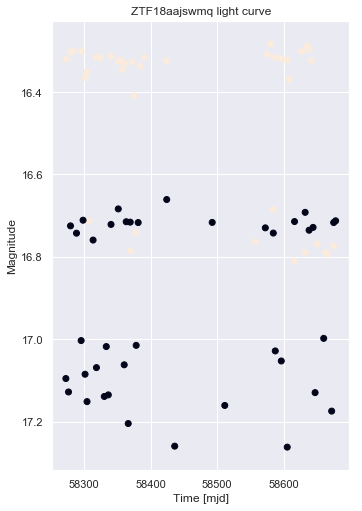

In [28]:
object_oid='ZTF18aajswmq'
object_detections = detections.loc[object_oid]

plt.figure()
plt.subplot(1, 2, 1)
plt.scatter(
    object_detections.mjd,
    object_detections.magpsf_corr,
    c=object_detections.fid)

plt.gca().invert_yaxis()
plt.xlabel('Time [mjd]')
plt.ylabel('Magnitude')
plt.title(f'{object_oid} light curve')

Text(0.5,1,'ZTF18aazmvhd light curve')

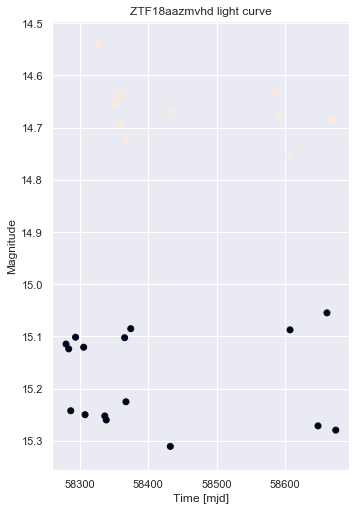

In [29]:
object_oid='ZTF18aazmvhd'
object_detections = detections.loc[object_oid]

plt.figure()
plt.subplot(1, 2, 1)
plt.scatter(
    object_detections.mjd,
    object_detections.magpsf_corr,
    c=object_detections.fid)

plt.gca().invert_yaxis()
plt.xlabel('Time [mjd]')
plt.ylabel('Magnitude')
plt.title(f'{object_oid} light curve')

Text(0.5,1,'ZTF18abadnlw light curve')

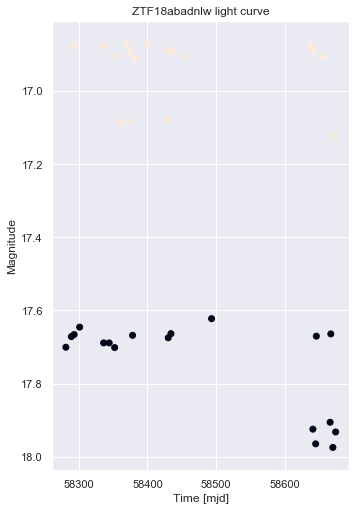

In [39]:
object_oid='ZTF18abadnlw'
object_detections = detections.loc[object_oid]

plt.figure()
plt.subplot(1, 2, 1)
plt.scatter(
    object_detections.mjd,
    object_detections.magpsf_corr,
    c=object_detections.fid)

plt.gca().invert_yaxis()
plt.xlabel('Time [mjd]')
plt.ylabel('Magnitude')
plt.title(f'{object_oid} light curve')

In [24]:
#Para el cluster de abajo a la izq

arreglosx=[]
arreglosy=[]
for i in range(len(tsne_obj)):
    if tsne_obj[i][0]<-17 and tsne_obj[i][0]>-37 and tsne_obj[i][1]<-20 and tsne_obj[i][1]>-35:
        arreglosx.append(tsne_obj[i][0])
        arreglosy.append(tsne_obj[i][1])
        
nelem=[]
for j in range(len(arreglosx)):
    for i in range(len(tsne_obj)):
        if tsne_obj[i][0]== arreglosx[j]:
            nelem.append(i)

        
sinclas=[]
for k in range(len(nelem)):
    if nelem[k]>1198:
        sinclas.append(nelem[k])
        
Cjto1=dff.index[sinclas] 
Cjto1

Index(['ZTF18aaxlsqp', 'ZTF18aajqdiu', 'ZTF18ablwjmp', 'ZTF18abchtdl',
       'ZTF18abaqjzg', 'ZTF18aaalpbq', 'ZTF18aakholu', 'ZTF18aaxmyeo',
       'ZTF18abgtshz', 'ZTF18abvbixa', 'ZTF18aapakuc', 'ZTF18abssewg',
       'ZTF18abchjdc', 'ZTF18aaxpqku', 'ZTF18abcrcyl', 'ZTF19aawfwug',
       'ZTF18abctuez', 'ZTF18abnyjvx', 'ZTF18abaspxp', 'ZTF18ablsiea',
       'ZTF18abmfwyv', 'ZTF18abjqmss', 'ZTF18aayvggs', 'ZTF18abavrhs',
       'ZTF18abajdjn', 'ZTF18acbaduz', 'ZTF18aazlqng', 'ZTF18abedbog',
       'ZTF18achzutb', 'ZTF18abdhauh', 'ZTF18abctujz', 'ZTF18aayxhfo',
       'ZTF18aayfbpb', 'ZTF18abbxdab', 'ZTF18aawvkuy', 'ZTF18acpgwcx',
       'ZTF18aaxukuw', 'ZTF18abgtlab', 'ZTF18abnkanj', 'ZTF18abgdfcw',
       'ZTF18aaaeldg', 'ZTF18acoqwud', 'ZTF18abokskf', 'ZTF18acrvqco',
       'ZTF18abbtyva', 'ZTF18aaxlslr', 'ZTF18abcxfse', 'ZTF18abtinmg',
       'ZTF18aauehri', 'ZTF18abdbipe', 'ZTF18abadmoz', 'ZTF18abjhbix',
       'ZTF18aaaatjf', 'ZTF18abcveud', 'ZTF18abllssy', 'ZTF18aaxcyvw',
      

### Curva de luz del cluster 2

Text(0.5,1,'ZTF18abokskf light curve')

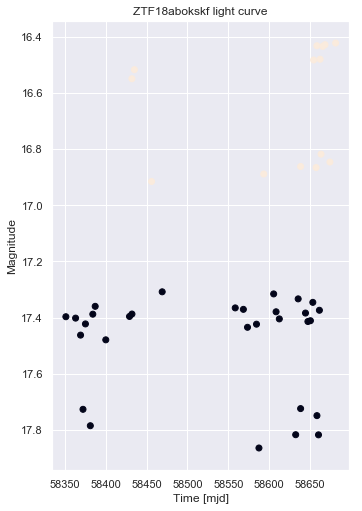

In [30]:
object_oid='ZTF18abokskf'
object_detections = detections.loc[object_oid]

plt.figure()
plt.subplot(1, 2, 1)
plt.scatter(
    object_detections.mjd,
    object_detections.magpsf_corr,
    c=object_detections.fid)

plt.gca().invert_yaxis()
plt.xlabel('Time [mjd]')
plt.ylabel('Magnitude')
plt.title(f'{object_oid} light curve')

Text(0.5,1,'ZTF18abmfwyv light curve')

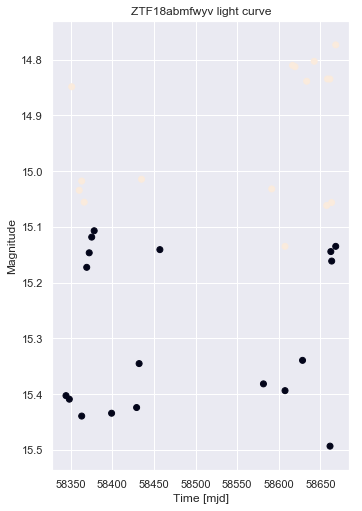

In [31]:
object_oid='ZTF18abmfwyv'
object_detections = detections.loc[object_oid]

plt.figure()
plt.subplot(1, 2, 1)
plt.scatter(
    object_detections.mjd,
    object_detections.magpsf_corr,
    c=object_detections.fid)

plt.gca().invert_yaxis()
plt.xlabel('Time [mjd]')
plt.ylabel('Magnitude')
plt.title(f'{object_oid} light curve')

In [25]:
#Para el cluster de abajo al centro

arreglosx=[]
arreglosy=[]
for i in range(len(tsne_obj)):
    if tsne_obj[i][0]<0 and tsne_obj[i][0]>-15 and tsne_obj[i][1]<-20 and tsne_obj[i][1]>-40:
        arreglosx.append(tsne_obj[i][0])
        arreglosy.append(tsne_obj[i][1])
        
nelem=[]
for j in range(len(arreglosx)):
    for i in range(len(tsne_obj)):
        if tsne_obj[i][0]== arreglosx[j]:
            nelem.append(i)

        
sinclas=[]
for k in range(len(nelem)):
    if nelem[k]>1198:
        sinclas.append(nelem[k])
        
Cjto1=dff.index[sinclas] 
Cjto1

Index(['ZTF18abbsnps', 'ZTF18abbodcc', 'ZTF17aaawhgn', 'ZTF18aavejap',
       'ZTF18abrzvms', 'ZTF18acbdcfp', 'ZTF18aaxakvt', 'ZTF17aaakfqh',
       'ZTF18abwdrnt', 'ZTF18abbufhh',
       ...
       'ZTF18ablvtws', 'ZTF18abaehfj', 'ZTF18aavzlhg', 'ZTF18abukuom',
       'ZTF18aabfyyx', 'ZTF18abcpgyb', 'ZTF18abmawnf', 'ZTF18abehxym',
       'ZTF18abablni', 'ZTF18acbzlkh'],
      dtype='object', name='oid', length=120)

### Curvas de luz del cluster 3

Text(0.5,1,'ZTF18abbsnps light curve')

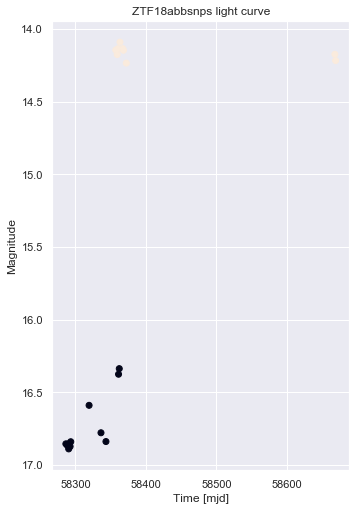

In [32]:
object_oid='ZTF18abbsnps'
object_detections = detections.loc[object_oid]

plt.figure()
plt.subplot(1, 2, 1)
plt.scatter(
    object_detections.mjd,
    object_detections.magpsf_corr,
    c=object_detections.fid)

plt.gca().invert_yaxis()
plt.xlabel('Time [mjd]')
plt.ylabel('Magnitude')
plt.title(f'{object_oid} light curve')

# Aplicacion de Kmeans

In [33]:
from mpl_toolkits.mplot3d import Axes3D 

from sklearn.cluster import KMeans 
from matplotlib import colors as mcolors 
import math 

In [34]:
clusters = 15
  
model = KMeans(n_clusters = clusters) 
model.fit(data_norm2.iloc[:,0:96]) 

md_k = pd.Series(model.labels_)

In [35]:
data_norm2['Clust'] = model.labels_
data_norm2.tail()

,n_samples_1,Amplitude_1,AndersonDarling_1,Autocor_length_1,Beyond1Std_1,Con_1,Eta_e_1,Gskew_1,MaxSlope_1,Mean_1,...,GP_DRW_sigma_2,GP_DRW_tau_2,SF_ML_amplitude_2,SF_ML_gamma_2,IAR_phi_2,LinearTrend_2,gal_b,gal_l,clase,Clust
oid,,,,,,,,,,,,,,,,,,,,,
ZTF18aazwhsx,0.218391,0.041077,1.000000,0.0,0.498027,0.0,0.003376,0.548170,0.036595,0.290972,...,8.045690e-04,0.000505,1.465217e-07,0.086014,0.986844,0.174404,0.433666,0.285971,sin-clase,1
ZTF17aabljbh,0.042146,0.120353,0.999954,0.0,0.595223,0.0,0.399073,0.557852,0.000072,0.541281,...,4.325921e-03,0.000007,3.364910e-07,0.085563,0.965558,0.179253,0.480443,0.597660,sin-clase,2
ZTF18aakjbff,0.049808,0.010353,0.918125,0.0,0.460599,0.0,0.170124,0.562456,0.001049,0.403227,...,9.382366e-11,0.000860,2.003266e-08,0.085904,0.297234,0.176172,0.750239,0.284956,sin-clase,3
ZTF18aabkdix,0.030651,0.126440,0.957180,0.0,0.351618,0.0,0.242287,0.604974,0.000047,0.503470,...,2.494963e-03,0.000143,2.323920e-07,0.084551,0.999827,0.177433,0.768314,0.444211,sin-clase,2
ZTF18acbzlkh,0.015326,0.032270,0.976405,0.0,0.502210,0.0,0.054826,0.566227,0.101035,0.669400,...,3.625110e-03,0.001441,3.231709e-07,0.085904,0.403248,0.181819,0.392131,0.418299,sin-clase,4


In [36]:
tres=data_norm2['Clust']==0
data3=data_norm2[tres]
v3=data3['clase']=='sin-clase'

print('La cantidad de elementos sin-clase en este cluster es de '+ str(len(data3[v3]))+', con un total de '+str(len(v3))+' elementos' )

tres=data_norm2['Clust']==1
data3=data_norm2[tres]
v3=data3['clase']=='sin-clase'

print('La cantidad de elementos sin-clase en este cluster es de '+ str(len(data3[v3]))+', con un total de '+str(len(v3))+' elementos' )

La cantidad de elementos sin-clase en este cluster es de 87, con un total de 120 elementos
La cantidad de elementos sin-clase en este cluster es de 126, con un total de 244 elementos


In [37]:
for i in range(0,15):
    
    tres=data_norm2['Clust']==i
    data3=data_norm2[tres]
    v3=data3['clase']=='sin-clase'

    print('La cantidad de elementos sin-clase en este cluster ' + str(i) +' es de '+ str(len(data3[v3]))+', con un total de '+str(len(v3))+
          ' elementos, con un ' + str("{0:.4f}".format(len(data3[v3])*100/len(v3)))+'%' )

La cantidad de elementos sin-clase en este cluster 0 es de 87, con un total de 120 elementos, con un 72.5000%
La cantidad de elementos sin-clase en este cluster 1 es de 126, con un total de 244 elementos, con un 51.6393%
La cantidad de elementos sin-clase en este cluster 2 es de 122, con un total de 266 elementos, con un 45.8647%
La cantidad de elementos sin-clase en este cluster 3 es de 72, con un total de 104 elementos, con un 69.2308%
La cantidad de elementos sin-clase en este cluster 4 es de 25, con un total de 111 elementos, con un 22.5225%
La cantidad de elementos sin-clase en este cluster 5 es de 100, con un total de 219 elementos, con un 45.6621%
La cantidad de elementos sin-clase en este cluster 6 es de 102, con un total de 167 elementos, con un 61.0778%
La cantidad de elementos sin-clase en este cluster 7 es de 2, con un total de 68 elementos, con un 2.9412%
La cantidad de elementos sin-clase en este cluster 8 es de 145, con un total de 239 elementos, con un 60.6695%
La canti

Text(0.5,1,'t-SNE')

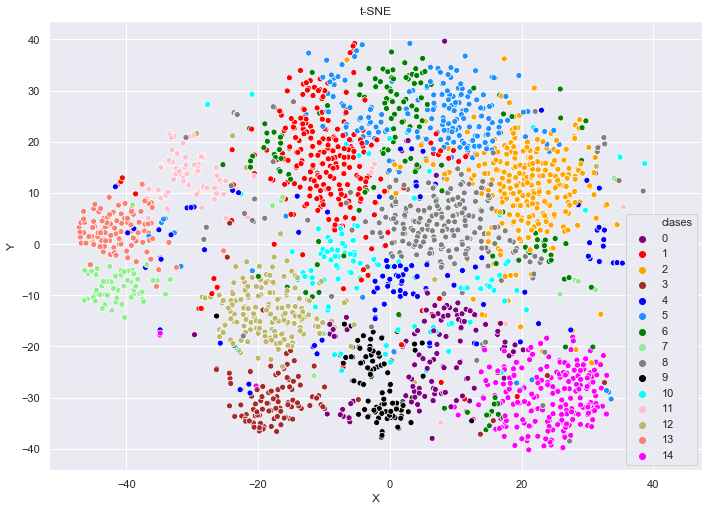

In [38]:
NuevaData1 = DFalldata[DFalldata.columns.values[importance_order[0:59]]]
dff=NuevaData1
y=data_norm2.iloc[:,97]
#y=data_norm.iloc[:,95]
#data_norm2=(dff-dff.min())/(dff.max()-dff.min())
tsne_obj= tsne.fit_transform(data_norm2.iloc[:,0:96])
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'clases':y})

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x="X", y="Y",
              hue="clases",
              palette=['purple','red','orange','brown','blue',
                       'dodgerblue','green','lightgreen','gray','black','aqua','pink','darkkhaki','salmon','fuchsia',],#'crimson',],
              legend='full',
              data=tsne_df);
plt.title('t-SNE')

## Parametric t-SNE

In [11]:
from parametric_tSNE import Parametric_tSNE

high_dims = data_norm.shape[1]
num_outputs = 2
perplexity = 40
ptSNE = Parametric_tSNE(high_dims, num_outputs, perplexity)
ptSNE.fit(data_norm)
output_res = ptSNE.transform(data_norm)



AttributeError: module 'tensorflow.python.keras.layers' has no attribute 'Dense'

In [ ]:
y=DFalldata.iloc[:,96]
tsne_df = pd.DataFrame({'X':output_res[:,0],
                        'Y':output_res[:,1],
                        'clases':y})



import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x="X", y="Y",
              hue="clases",
              palette=['purple','red','orange','brown','blue',
                       'dodgerblue','green','lightgreen','gray','black','aqua','pink','darkkhaki',],
              legend='full',
              data=tsne_df,alpha=0.7);
plt.title('t-SNE')